## Importing necessary libraries

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [79]:
df = pd.read_csv('E:\Work Space\Ecko data\Logistic heart_dataset\heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [80]:
np.unique(df['target'],return_counts=True)

(array([0, 1], dtype=int64), array([138, 165], dtype=int64))

## Balancing data

In [81]:
sme = SMOTE()
arr = df.values
X = arr[:,:-1]
y = arr[:,-1]
X_bal,y_bal = sme.fit_resample(X,y)

In [82]:
print(X_bal.shape)

(330, 13)


## Scaling and Splitting data

In [83]:
scaler = StandardScaler()
X_bal = scaler.fit_transform(X_bal)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size = 0.3)

In [85]:
np.unique(y_train, return_counts = True)

(array([0., 1.]), array([113, 118], dtype=int64))

## Fitting Model and Testing

In [86]:
logreg = LogisticRegression(solver ='saga', penalty = 'elasticnet', l1_ratio = 0.5)
logreg.fit(X_train, y_train)

LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [87]:
y_pred = logreg.predict(X_test)

In [88]:
print(y_pred)
print(y_test)

[0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0.
 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 0.]
[0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 0.]


In [89]:
print(accuracy_score(y_test, y_pred))

0.898989898989899


In [90]:
def acc_with_Threshold(threshArr,X_test,y_test,model):
    acc_ls = []
    for thresh in threshArr:
        preds = np.where(logreg.predict_proba(X_test)[:,1] > thresh, 1, 0)## if greater return 1 else 0
        acc = accuracy_score(y_test,preds)
        acc_ls.append(acc)
    acc_ls = np.array(acc_ls)
    idx = np.argmax(acc_ls)
    print(threshArr[idx],acc_ls[idx])
    fig = plt.figure()
    
    plt.xticks(threshArr)
    plt.plot(threshArr,acc_ls)
    fig.tight_layout()
    
    plt.show()

0.44999999999999996 0.8787878787878788


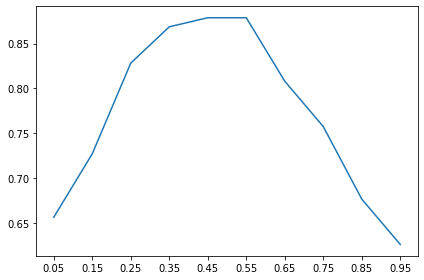

In [91]:
threshArr = np.linspace(0.05,0.95,10)
acc_with_Threshold(threshArr,X_test,y_test,logreg)